Project notebook


In [116]:

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
import seaborn as sns


In [76]:
csvpath_09_20_clean = os.path.join("..","Kelly", "crime_09_20_clean.csv")


In [77]:
crime_09_20_clean_df = pd.read_csv(csvpath_09_20_clean, encoding="utf-8", low_memory=False)
crime_09_20_clean_df

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,2308,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,2302,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,2303,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,2303,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,2303,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
364417,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,NaN,Harland Terrace,33.75377,-84.47405,2020,1
364418,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,NaN,Mechanicsville,33.73990,-84.40488,2020,1
364419,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,NaN,Inman Park,33.76553,-84.34934,2020,1
364420,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,NaN,Old Fourth Ward,33.76391,-84.37489,2020,1


In [238]:
#Sort by offense id
offense_sort = crime_09_20_clean_df.sort_values("offense_id", ascending = False)
# offense_sort

#Check for repeat offense id

crime_09_20_clean_df["offense_id"].nunique()



364109

In [79]:
#Count how many rows we have per year in original df to compare after duplicate drop
group_year = crime_09_20_clean_df.groupby(['occur_year']).count()
group_year

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,occur_month
occur_year,,,,,,,,,,
2009,39326,39326,39326,39326,39326,39323,38028,39326,39326,39326
2010,35529,35529,35529,35529,35529,35525,34259,35529,35529,35529
2011,34852,34852,34852,34852,34852,34725,33551,34852,34852,34852
2012,33382,33382,33382,33382,33382,33376,32105,33382,33382,33382
2013,32398,32398,32398,32397,32398,32393,31311,32398,32398,32398
2014,31115,31115,31115,31115,31115,31112,30038,31115,31115,31115
2015,30058,30058,30058,30057,30058,30054,28936,30058,30058,30058
2016,29006,29006,29006,29006,29006,29005,27857,29006,29006,29006
2017,26386,26386,26386,26386,26386,26385,25453,26386,26386,26386


In [164]:
#show info about duplicates
crime_09_20_clean_df.info(), duplicates.info()

#Get duplicates into a variable. Maybe unnecessary?
# duplicates = crime_09_20_clean_df[crime_09_20_clean_df.duplicated(subset=["offense_id", "occur_year","occur_time",
#                                                                           "UC2_Literal", "location"])] 
                                                                                                                                                  
#Pull a specific offense id and check where it's duplicated
offense_193621541 = crime_09_20_clean_df.loc[(crime_09_20_clean_df["offense_id"]==193621541)]
print(offense_193621541)

#Note duplicates may occur due to ibr_code. We are not using that column for our analysis, we should delete that column.
#Also sometimes duplicate IDs occur due to differing UC2_Literal entries. We want those!

offense_id        int64
occur_date       object
occur_time       object
location         object
UC2_Literal      object
ibr_code         object
neighborhood     object
lat             float64
long            float64
occur_year        int64
occur_month       int64
dtype: object

In [87]:
#Drop the ibr_code column 
crime_no_ibr_df = crime_09_20_clean_df.drop("ibr_code", inplace = False, axis = 1)

#show info about duplicates
crime_no_ibr_df.info(), duplicates.info()

# #Put duplicates into a variable 
duplicates = crime_no_ibr_df[crime_no_ibr_df.duplicated(subset=["offense_id", "occur_year",
                                                                "occur_time", "UC2_Literal", "location"])]

#Duplicates are still 174 rows -  now delete them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364422 entries, 0 to 364421
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   offense_id    364422 non-null  int64  
 1   occur_date    364422 non-null  object 
 2   occur_time    364422 non-null  object 
 3   location      364420 non-null  object 
 4   UC2_Literal   364422 non-null  object 
 5   neighborhood  351124 non-null  object 
 6   lat           364422 non-null  float64
 7   long          364422 non-null  float64
 8   occur_year    364422 non-null  int64  
 9   occur_month   364422 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 27.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 185 to 352534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   offense_id    174 non-null    int64  
 1   occur_date    174 non-null    object 
 2   occur_time 

In [106]:
#Drop the duplicates
crime_no_ibr_df.drop_duplicates(["offense_id", "occur_year", "occur_time", "UC2_Literal", "location"], inplace = True)

#list of the duplicated offense
duplicate_list = duplicates.loc[:,"offense_id"].unique()
duplicate_list


array([193621541, 193522385, 193302001, 193051223, 192782336, 191901234,
       191841501, 191732212, 191652173, 191612131, 190800450, 183242277,
       182782034, 181951904, 181450624, 180490058, 173032162, 172872007,
       172222749, 172070629, 171570931, 171102649, 170892557, 170780462,
       170721513, 170471026, 170281450, 170231299, 170220467, 163622379,
       163590355, 163140668, 163062304, 162940662, 162841776, 162680362,
       162551798, 162490646, 162350567, 162021073, 161893131, 161702767,
       161671338, 161481137, 161112712, 161082554, 160462679, 160300393,
       160051549, 153320375, 153132754, 152963147, 152560107, 152512817,
       152291871, 151612311, 151343055, 151160104, 150643489, 150470968,
       150382119, 143290252, 143082867, 143060356, 142470299, 142182364,
       141960098, 141940999, 141150406, 140981582, 140762374, 140202516,
       132832468, 132770506, 132530452, 132142945, 131661550, 131590557,
       131392296, 130681785, 130061511, 123581380, 

In [107]:
#Display new dataframe after dropping duplicates and check row number
crime_no_ibr_df

#364422 original number of rows, dropped 174 rows as expected

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364417,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364418,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364419,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364420,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [114]:
#Check for repeat offense id - Number of unique is less than the number of rows in the df. That's fine because remember
#we have some duplicated offense ids due to two crimes occurring at the same location at the same time.

crime_no_ibr_df["offense_id"].nunique()

364109

In [108]:
#Compare year counts to original above after dropping duplicates - looks fairly even across years
group_year_dups_removed = crime_no_ibr_df.groupby(['occur_year']).count()
group_year_dups_removed

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_month
occur_year,,,,,,,,,
2009,39297,39297,39297,39297,39297,38000,39297,39297,39297
2010,35501,35501,35501,35501,35501,34231,35501,35501,35501
2011,34833,34833,34833,34833,34833,33534,34833,34833,34833
2012,33370,33370,33370,33370,33370,32093,33370,33370,33370
2013,32389,32389,32389,32388,32389,31302,32389,32389,32389
2014,31104,31104,31104,31104,31104,30028,31104,31104,31104
2015,30046,30046,30046,30045,30046,28925,30046,30046,30046
2016,28986,28986,28986,28986,28986,27838,28986,28986,28986
2017,26373,26373,26373,26373,26373,25440,26373,26373,26373


In [112]:
#Export the df with duplicates dropped to a csv for everyone
crime_no_ibr_df.to_csv("crime_09_20_clean_dupsdeleted.csv", index=False, header=True)


In [7]:
#No longer need this code as the original cleaned data we started with this time has no 2021

#remove 2021 data from original df
# no_2021_df = crime_no_ibr_df.drop(crime_no_ibr_df[crime_no_ibr_df.occur_year ==2021].index)
# no_2021_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,timestamp,occur_year,occur_month
0,61681984,6/17/2009,1400,375 AUBURN AVE,LARCENY-NON VEHICLE,Browns Mill Park,33.681430,-84.396690,6/17/2009,2009,6
1,72692336,2/24/2010,2329,600 MARTIN ST,AGG ASSAULT,Pittsburgh,33.722120,-84.394600,2/24/2010,2010,2
2,81830088,1/25/2010,830,400 FLETCHER ST SW,HOMICIDE,Pittsburgh,33.725540,-84.401070,1/25/2010,2010,1
3,90010061,1/1/2009,10,501 TUFTON TRL SE,BURGLARY-RESIDENCE,Glenrose Heights,33.664770,-84.384300,1/1/2009,2009,1
4,90010159,1/1/2009,57,BUCKEAD AVE/GRANDVIEW AVE,ROBBERY-PEDESTRIAN,Buckhead Village,33.837520,-84.375740,1/1/2009,2009,1
...,...,...,...,...,...,...,...,...,...,...,...
345609,210240924,12/21/2020,17:00,253 14TH ST NE,LARCENY-NON VEHICLE,Midtown,33.786143,-84.379298,12/21/2020,2020,12
345769,210260826,9/9/2020,12:00,3230 PEACHTREE RD,AUTO THEFT,Buckhead Forest,33.842778,-84.373518,9/9/2020,2020,9
345770,210260828,10/6/2020,8:00,1250 OAKLAND TERRACE SW,LARCENY-NON VEHICLE,Oakland City,33.720890,-84.428929,10/6/2020,2020,10
345771,210260831,1/26/2020,11:54,1459 MACKLONE ST NE,LARCENY-NON VEHICLE,Edgewood,33.755787,-84.339692,1/26/2020,2020,1


In [138]:
#Showing homicides; this was for debugging - don't really need this code

homicide = crime_no_ibr_df.loc[(crime_no_ibr_df["UC2_Literal"]=="HOMICIDE")]
print(homicide)

        offense_id  occur_date occur_time                     location  \
12       193650313  12/31/2019        400             2531 LENOX RD NE   
79       193640345  12/30/2019        300         980 WASHINGTON ST SW   
1751     193402048   12/6/2019       1830         387 CLEVELAND AVE SW   
1808     193402258   12/6/2019       2005             62 HARWELL RD NW   
1931     193381415   12/4/2019       1530  I-285 SB EXPY S / I-20 EXPY   
...            ...         ...        ...                          ...   
363117   200180440   1/18/2020       3:31               28 IRBY AVE NW   
363366   200151818   1/15/2020      17:15       549 JOSEPH LOWERY BLVD   
363789   200100013    1/9/2020      23:45            1977 JONES AVE NW   
364000   200061707    1/6/2020       0:00            785 PEYTON AVE NW   
364302   200021209    1/2/2020      15:21               12 BROAD ST SW   

       UC2_Literal            neighborhood       lat      long  occur_year  \
12        HOMICIDE  Lindridge/Mar

In [96]:
#Get overall number of crimes reported per year
year_counts = crime_no_ibr_df["occur_year"].value_counts()
print(year_counts)

#Convert to df and add a separate index column
year_counts_df = pd.DataFrame(year_counts).reset_index()

#Rename columns
year_counts_df = year_counts_df.rename(columns={"index": "Year", "occur_year": "Reported Crimes"})
year_counts_df

#Note vast difference in 2020 with the new cleaned dataset
#Also don't really  need to convert the above to a df; can just plot the year_counts itself and it's easier

2009    39297
2010    35501
2011    34833
2012    33370
2013    32389
2014    31104
2015    30046
2016    28986
2017    26373
2018    25606
2019    24842
2020    21901
Name: occur_year, dtype: int64


,Year,Reported Crimes
0,2009,39297
1,2010,35501
2,2011,34833
3,2012,33370
4,2013,32389
5,2014,31104
6,2015,30046
7,2016,28986
8,2017,26373
9,2018,25606


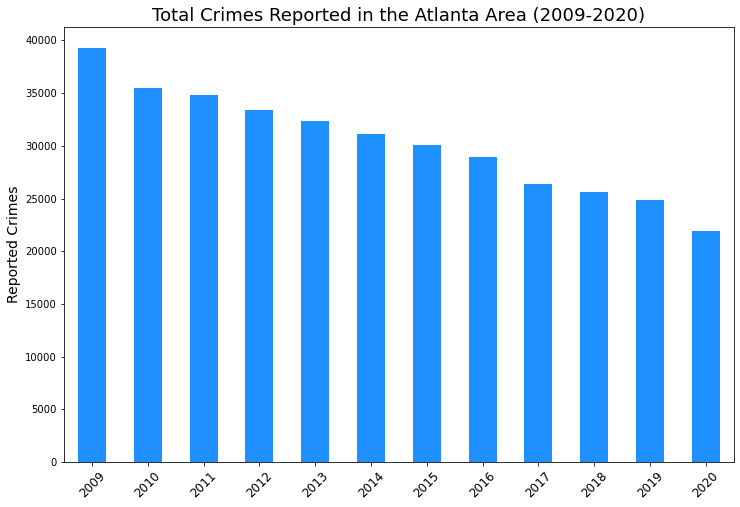

In [264]:
#Plot a bar chart of number of crimes by year
year_counts.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area (2009-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

    Year  Reported Crimes
9   2018            25606
10  2019            24842
11  2020            21901


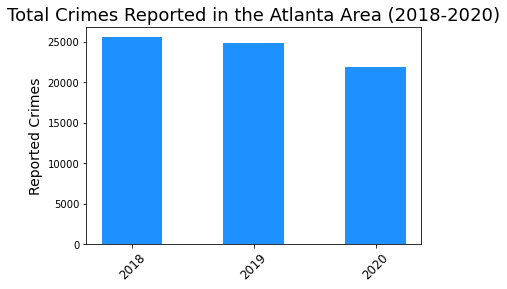

In [265]:
#Just pull 2018, 2019, 2020 for a more concentrated comparison
three_years = year_counts_df.loc[(year_counts_df["Year"]==2018) |(year_counts_df["Year"]==2019) | (year_counts_df["Year"]==2020)]
print(three_years)

#Set the chart type as bar, x-axis is the Year, y is the number of crimes, set color and width of bars
plt.bar(three_years["Year"], three_years["Reported Crimes"], color = 'dodgerblue', align='center', width=0.5)

#Set placement of tick marks - just doing a pandas plot puts half year tick marks as well....
plt.xticks(three_years["Year"], rotation = 45, fontsize = (12))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area (2018-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()


In [103]:
#Group original dataframe by year and crime, count to show number of offenses for each type of crime
year_offense_group =crime_no_ibr_df.groupby(["occur_year", "UC2_Literal"])['offense_id'].count()
year_offense_group

occur_year  UC2_Literal         
2009        AGG ASSAULT             2589
            AUTO THEFT              5622
            BURGLARY-NONRES         1682
            BURGLARY-RESIDENCE      7393
            HOMICIDE                  77
                                    ... 
2020        HOMICIDE                 146
            LARCENY-FROM VEHICLE    8584
            LARCENY-NON VEHICLE     4628
            MANSLAUGHTER               2
            ROBBERY                  889
Name: offense_id, Length: 119, dtype: int64

In [104]:
#make year_offense into a dataframe and reset the index
year_offense_df = pd.DataFrame(year_offense_group).reset_index()

year_offense_df


,occur_year,UC2_Literal,offense_id
0,2009,AGG ASSAULT,2589
1,2009,AUTO THEFT,5622
2,2009,BURGLARY-NONRES,1682
3,2009,BURGLARY-RESIDENCE,7393
4,2009,HOMICIDE,77
...,...,...,...
114,2020,HOMICIDE,146
115,2020,LARCENY-FROM VEHICLE,8584
116,2020,LARCENY-NON VEHICLE,4628
117,2020,MANSLAUGHTER,2


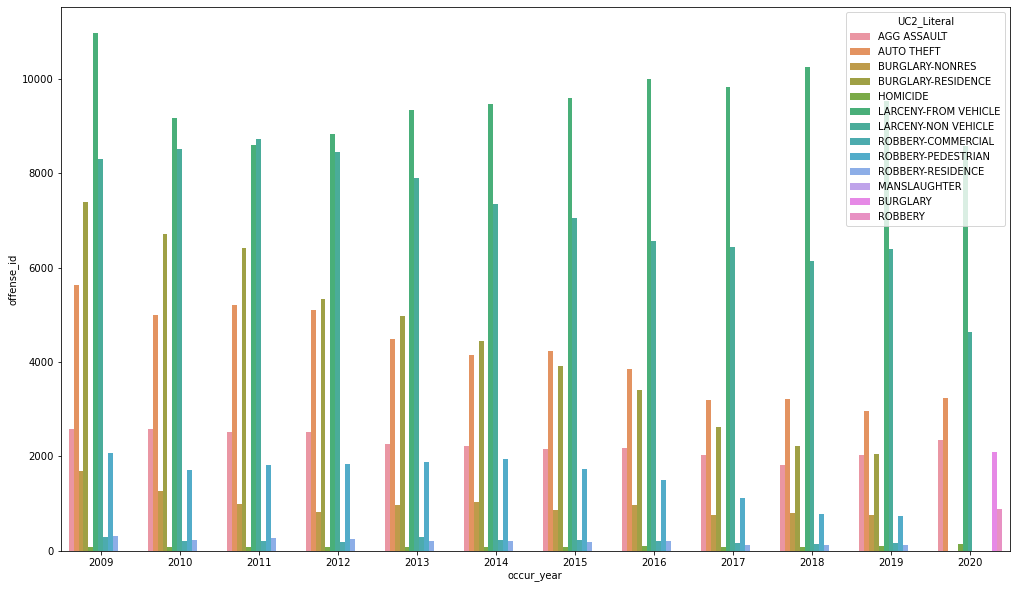

In [124]:
#Plot figure of all years and types of crimes. Will likely be too large to use in presentation or be useful there

#Use Matplotlib to set figure size first
plt.figure(figsize=(17,10))

#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'UC2_Literal', data = year_offense_df)
plt.show()


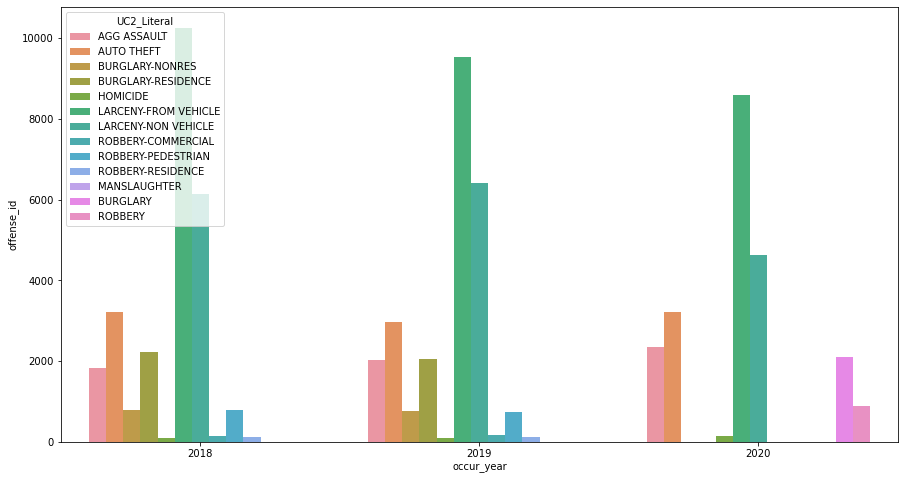

In [130]:
#Select 2018 - 2020 for closer analysis of above
three_years_type = year_offense_df.loc[(year_offense_df["occur_year"]==2018) |(year_offense_df["occur_year"]==2019) | (year_offense_df["occur_year"]==2020)]

#Reset df index
three_years_type_df = three_years_type.reset_index()

#Use Matplotlib to set figure size ahead
plt.figure(figsize=(15,8))

#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'UC2_Literal', data = three_years_type_df)
plt.show()

#Oh wow....something weird going on with breakdown of robberies and burglaries. Look closer at 2020...

In [139]:
#Display and view categories closely
three_years_type_df

#Note that they got lazy in 2020: no longer breaking out burglaries and robberies by type. Consolidate previous years for comp

    index  occur_year UC2_Literal  offense_id
4      94        2018    HOMICIDE          88
14    104        2019    HOMICIDE         104
24    114        2020    HOMICIDE         146


,index,occur_year,UC2_Literal,offense_id
0,90,2018,AGG ASSAULT,1823
1,91,2018,AUTO THEFT,3219
2,92,2018,BURGLARY-NONRES,797
3,93,2018,BURGLARY-RESIDENCE,2226
4,94,2018,HOMICIDE,88
5,95,2018,LARCENY-FROM VEHICLE,10256
6,96,2018,LARCENY-NON VEHICLE,6145
7,97,2018,ROBBERY-COMMERCIAL,148
8,98,2018,ROBBERY-PEDESTRIAN,789
9,99,2018,ROBBERY-RESIDENCE,115


In [184]:
#Consolidated dataframe headings to match what's going on in 2020 with robberies and burglaries

crime_no_ibr_consolidated_df = crime_no_ibr_df.replace(
    {"BURGLARY-NONRES": "BURGLARY", "BURGLARY-RESIDENCE": "BURGLARY", "ROBBERY-COMMERCIAL" : "ROBBERY",
     "ROBBERY-PEDESTRIAN": "ROBBERY", "ROBBERY-RESIDENCE" : "ROBBERY"})
crime_no_ibr_consolidated_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364417,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364418,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364419,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364420,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [141]:
#Group new dataframe with consolidated headings by year and crime, count to show number of offenses for each type of crime
year_offense_group_two =crime_no_ibr_consolidated_df.groupby(["occur_year", "UC2_Literal"])['offense_id'].count()
year_offense_group_two

occur_year  UC2_Literal         
2009        AGG ASSAULT              2589
            AUTO THEFT               5622
            BURGLARY                 9075
            HOMICIDE                   77
            LARCENY-FROM VEHICLE    10966
                                    ...  
2020        HOMICIDE                  146
            LARCENY-FROM VEHICLE     8584
            LARCENY-NON VEHICLE      4628
            MANSLAUGHTER                2
            ROBBERY                   889
Name: offense_id, Length: 86, dtype: int64

In [142]:
#make year_offense into a dataframe and reset the index
year_offense_two_df = pd.DataFrame(year_offense_group_two).reset_index()

year_offense_two_df

,occur_year,UC2_Literal,offense_id
0,2009,AGG ASSAULT,2589
1,2009,AUTO THEFT,5622
2,2009,BURGLARY,9075
3,2009,HOMICIDE,77
4,2009,LARCENY-FROM VEHICLE,10966
...,...,...,...
81,2020,HOMICIDE,146
82,2020,LARCENY-FROM VEHICLE,8584
83,2020,LARCENY-NON VEHICLE,4628
84,2020,MANSLAUGHTER,2


Text(0.5, 0, '')

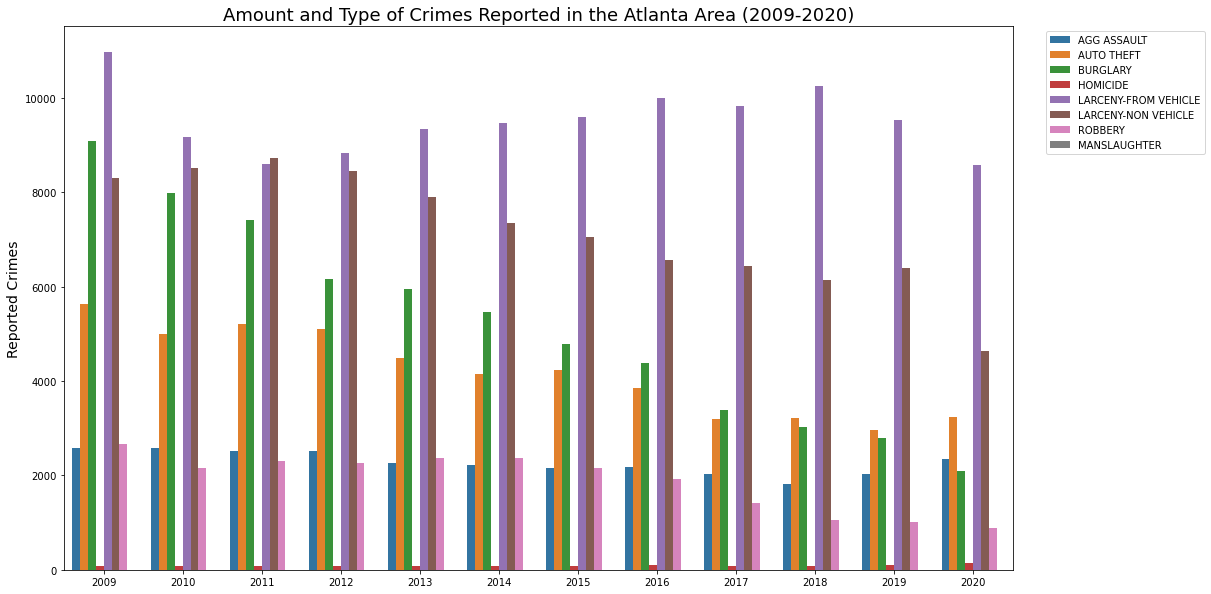

In [161]:
#Plot all years and types of crimes - will be very large

#Set figure size with MatPlotlib
plt.figure(figsize=(17,10))
#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'UC2_Literal', data = year_offense_two_df)

#Move legend
plt.legend(bbox_to_anchor= (1.03, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Amount and Type of Crimes Reported in the Atlanta Area (2009-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("")
plt.show()
#All crime type headings are now consolidated!

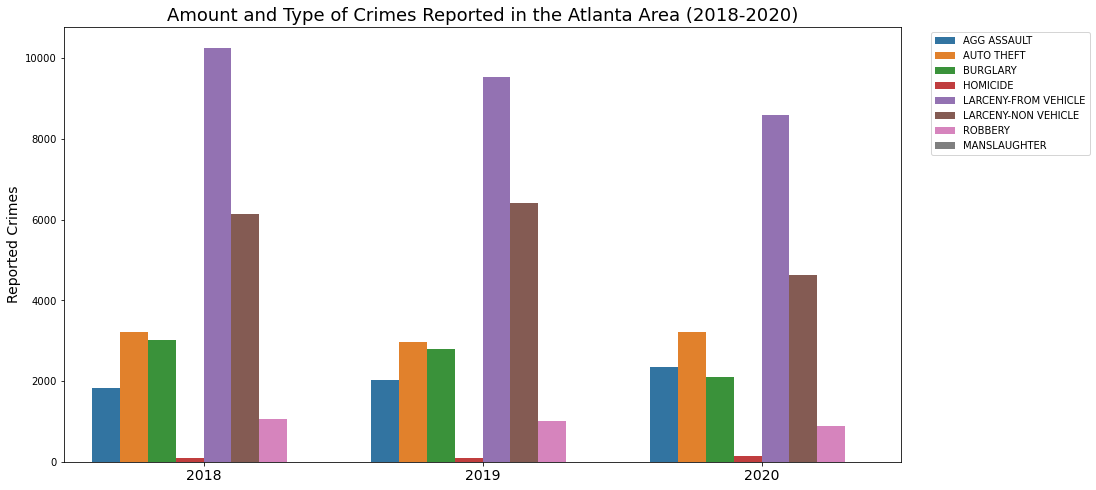

In [331]:
#Select 2018 - 2020 for closer analysis of above
three_years_type_two = year_offense_two_df.loc[(year_offense_two_df["occur_year"]==2018) |(year_offense_two_df["occur_year"]==2019)|(year_offense_two_df["occur_year"]==2020)]

#Reset the index
three_years_type_two_df = three_years_type_two.reset_index()

#Use Matplotlib to set figure size ahead
plt.figure(figsize=(15,8))

#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'UC2_Literal', data = three_years_type_two_df)

#Move the legend off of the plot to stop it from blocking data
plt.legend(bbox_to_anchor= (1.03, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Amount and Type of Crimes Reported in the Atlanta Area (2018-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("")
plt.xticks(fontsize = (14))
plt.show()
#Looks much better, but not particularly interesting - burglary has gone down in 2020 - maybe due to more folks at home. 

In [261]:
#Want to bin times for categories, but 2020 data has colon in its time column. Remove colons
crime_no_ibr_consolidated_df['occur_time'] = crime_no_ibr_consolidated_df['occur_time'].astype(str)
crime_no_ibr_consolidated_df["occur_time"] = crime_no_ibr_consolidated_df["occur_time"].replace(":","", regex=True)

#Change the column to numeric for binning
# pd.to_numeric(crime_09_20_clean_df["occur_time"])
#When I run above code, there is a problem at index 48388 - someone entered a T instead of a time. Need to fix

#Confirm the bad row and view
bad_time = crime_no_ibr_consolidated_df.loc[[48388],['occur_time']]
print(bad_time)

#For my time analysis I have to drop this one row - drop by index
good_time_df = crime_no_ibr_consolidated_df.drop(48388)

#Now convert time column to numeric for binning
good_time_df["occur_time"] = pd.to_numeric(good_time_df["occur_time"])

#This code also works to specify integer type but not needed here
# good_time_df["occur_time"] = good_time_df["occur_time"].astype(np.int64)

# Set up bins for time of day. Zero is a problem and won't sort into bins, use -np.inf
bins = [-np.inf, 559, 1159, 1759, 2459]

# Set up the names for the binned data
time_groups = ["Late/Early (12AM - 5:59AM)", "Morning (6AM - 11:59AM)", "Afternoon (12PM - 5:59PM)", "Night (6PM - 11:59PM)"]


# Segment the data and sort into bins; create a new column that assigns the proper bin name to each row based on age in that row
good_time_df["Time Category"] = pd.cut(good_time_df["occur_time"],
                                                       bins, labels = time_groups, right=True)

#Do a check that binning is working properly - pull some from a category
late_night = good_time_df.loc[(good_time_df["Time Category"]=="Late/Early (12AM - 5:59AM)")]
# print(late_night)

#Sort the dataframe by the index (which is the bin names) in ascending order
time_offense_df = good_time_df.sort_values("Time Category", ascending=True)

#Some midnight values entered as 2400, should be categorized to late at night.
late = (good_time_df['occur_time'] > 2359)
good_time_df['Time Category'][late] = "Late/Early (12AM - 5:59AM)"

#Recheck rows where they entered midnight as 2400+
time_wrong_format = good_time_df.loc[(good_time_df["occur_time"]>2359)]
time_wrong_format





      occur_time
48388          T


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Time Category
105059,160110705,1/11/2016,2430,1605 PONTIAC PL SE,AUTO THEFT,Custer/McDonough/Guice,33.71079,-84.35729,2016,1,Late/Early (12AM - 5:59AM)
116316,152411437,8/29/2015,2400,2640 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,Harland Terrace,33.75381,-84.47425,2015,8,Late/Early (12AM - 5:59AM)
119207,152080826,7/27/2015,2415,280 LOGAN ST SE,LARCENY-FROM VEHICLE,Grant Park,33.74457,-84.37834,2015,7,Late/Early (12AM - 5:59AM)
120066,151981142,7/17/2015,2400,663 ROBINSON AVE SE,BURGLARY,Grant Park,33.72828,-84.36583,2015,7,Late/Early (12AM - 5:59AM)
122783,151700966,6/18/2015,2400,730 LIBERTY COMMONS DR NW;,AUTO THEFT,Vine City,33.75575,-84.41565,2015,6,Late/Early (12AM - 5:59AM)
132630,150420704,2/11/2015,2400,1421 WESLEY WALK NW,BURGLARY,Margaret Mitchell,33.83718,-84.43076,2015,2,Late/Early (12AM - 5:59AM)
132992,150371423,2/6/2015,2400,1540 VAN EPPS ST SE,LARCENY-NON VEHICLE,East Atlanta,33.73740,-84.33749,2015,2,Late/Early (12AM - 5:59AM)
135949,143650926,12/31/2014,2400,655 HOLDERNESS ST SW,LARCENY-FROM VEHICLE,West End,33.73725,-84.42803,2014,12,Late/Early (12AM - 5:59AM)
152470,141901075,7/3/2014,2400,1955 CAMPBELLTON RD SW,AUTO THEFT,Venetian Hills,33.70830,-84.45292,2014,7,Late/Early (12AM - 5:59AM)
154040,141661092,6/15/2014,2400,809 MAGNOLIA WAY NW,AUTO THEFT,Vine City,33.75823,-84.41411,2014,6,Late/Early (12AM - 5:59AM)


In [272]:
#Group by the year and time of day, count the number of offenses 
time_offense_group =good_time_df.groupby(["occur_year", "Time Category"])['offense_id'].count()


#make time_offense into a dataframe and reset the index
time_offense_group_df = pd.DataFrame(time_offense_group).reset_index()
time_offense_group_df



,occur_year,Time Category,offense_id
0,2009,Late/Early (12AM - 5:59AM),6376
1,2009,Morning (6AM - 11:59AM),8121
2,2009,Afternoon (12PM - 5:59PM),11755
3,2009,Night (6PM - 11:59PM),13045
4,2010,Late/Early (12AM - 5:59AM),5421
5,2010,Morning (6AM - 11:59AM),7289
6,2010,Afternoon (12PM - 5:59PM),11170
7,2010,Night (6PM - 11:59PM),11621
8,2011,Late/Early (12AM - 5:59AM),5425
9,2011,Morning (6AM - 11:59AM),6681


Text(0.5, 0, '')

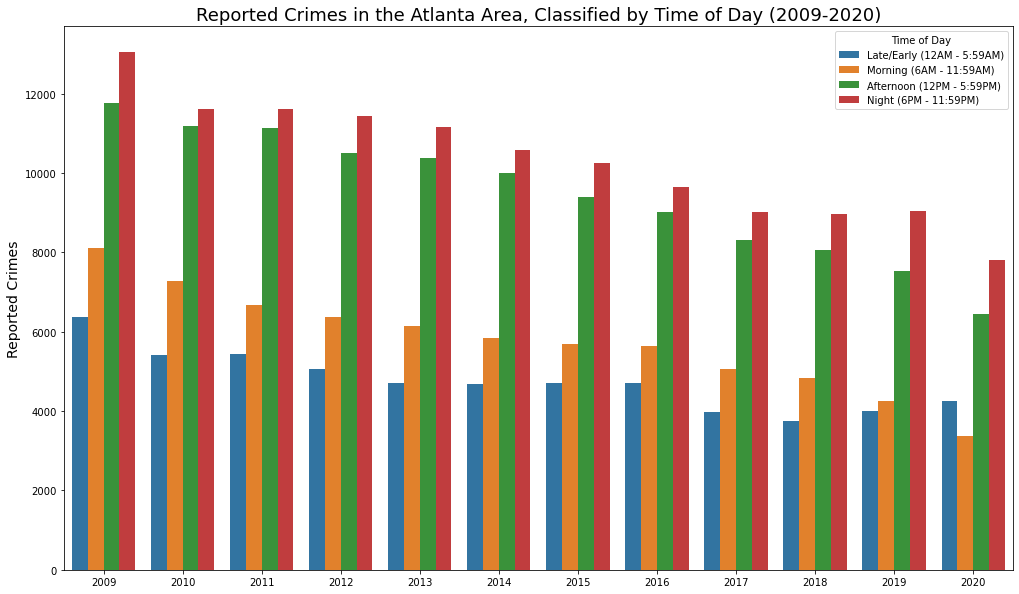

In [267]:
#Plot all years and times of crimes

#Set figure size with MatPlotlib
plt.figure(figsize=(17,10))
#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'Time Category', data = time_offense_group_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1), title = "Time of Day" );

#Add title and labels for each axis and set font size. 
plt.title("Reported Crimes in the Atlanta Area, Classified by Time of Day (2009-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("")
plt.show()

#Wow...crimes mostly occur when people are awake. Big shocker!

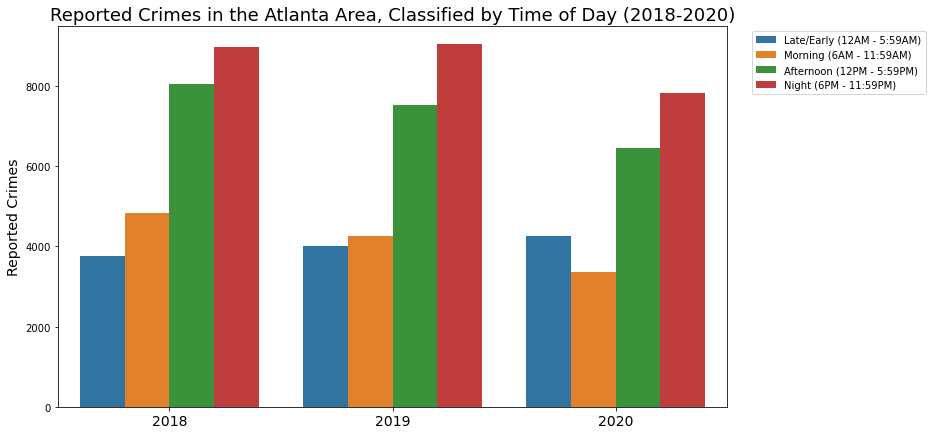

In [342]:
#Select 2018 - 2020 for closer analysis of above
three_years_time_df = time_offense_group_df.loc[(time_offense_group_df["occur_year"]==2018) |(time_offense_group_df["occur_year"]==2019)
                                              |(time_offense_group_df["occur_year"]==2020)]

#Use Matplotlib to set figure size ahead
plt.figure(figsize=(12,7))

#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'Time Category', data = three_years_time_df)

#Move the legend off of the plot to stop it from blocking data
plt.legend(bbox_to_anchor= (1.03, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Reported Crimes in the Atlanta Area, Classified by Time of Day (2018-2020)", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("")
plt.xticks(fontsize = (14))
plt.show()
#Trends overall the same, morning visibly dropped in 2020 in the trends

In [273]:
#Group by the year and time of day, and type of crime, count the number of offenses 
time_type_group =good_time_df.groupby(["occur_year", "Time Category", "UC2_Literal"])['offense_id'].count()


#make time_type into a dataframe and reset the index
time_type_group_df = pd.DataFrame(time_type_group).reset_index()
time_type_group_df

#Can't graph 4 variables this way so I'll have to pull out the data year by year to graph it - start with 2018 - 2020 individually
eighteen_time_type_df = time_type_group_df.loc[(time_type_group_df["occur_year"]==2018)]

nineteen_time_type_df = time_type_group_df.loc[(time_type_group_df["occur_year"]==2019)]

twenty_time_type_df = time_type_group_df.loc[(time_type_group_df["occur_year"]==2020)]


,occur_year,Time Category,UC2_Literal,offense_id
0,2009,Late/Early (12AM - 5:59AM),AGG ASSAULT,628
1,2009,Late/Early (12AM - 5:59AM),AUTO THEFT,1258
2,2009,Late/Early (12AM - 5:59AM),BURGLARY,1312
3,2009,Late/Early (12AM - 5:59AM),HOMICIDE,19
4,2009,Late/Early (12AM - 5:59AM),LARCENY-FROM VEHICLE,1675
...,...,...,...,...
379,2020,Night (6PM - 11:59PM),HOMICIDE,55
380,2020,Night (6PM - 11:59PM),LARCENY-FROM VEHICLE,3720
381,2020,Night (6PM - 11:59PM),LARCENY-NON VEHICLE,1075
382,2020,Night (6PM - 11:59PM),MANSLAUGHTER,1


Text(0.5, 0, 'Time of Day')

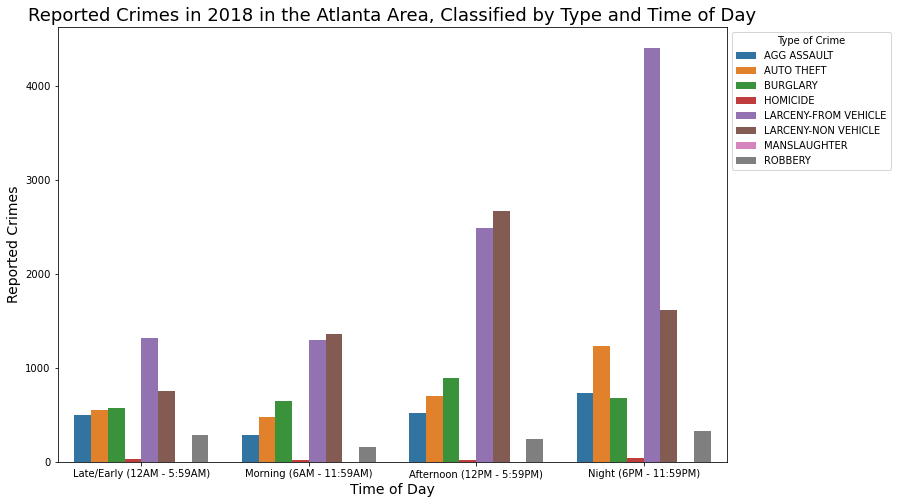

In [281]:
#Plot 2019 by time of day and type of crime
#Set figure size with MatPlotlib
plt.figure(figsize=(12,8))
#Plot with seaborn
sns.barplot(x = 'Time Category', y = 'offense_id', hue = 'UC2_Literal', data = nineteen_time_type_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1), title = "Type of Crime" );

#Add title and labels for each axis and set font size. 
plt.title("Reported Crimes in 2018 in the Atlanta Area, Classified by Type and Time of Day", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("Time of Day", fontsize = (14))
plt.show()


Text(0.5, 0, 'Time of Day')

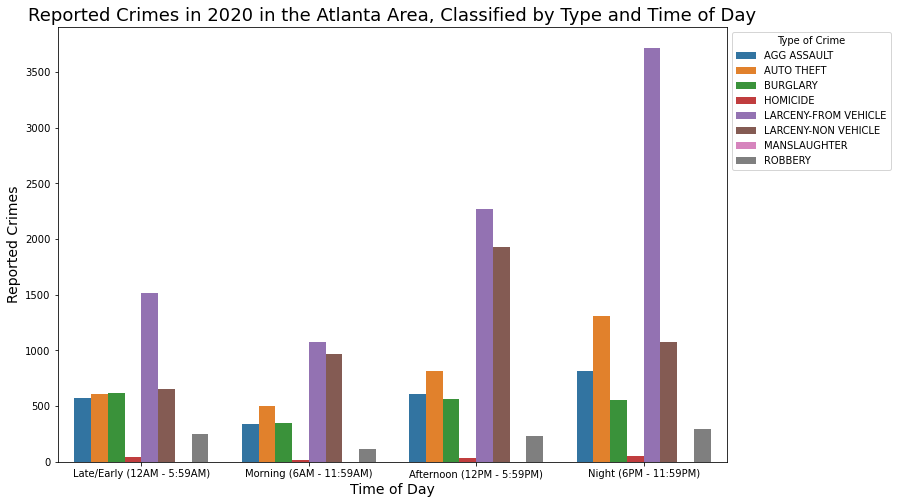

In [283]:
#Plot 2020 by time of day and type of crime
#Set figure size with MatPlotlib
plt.figure(figsize=(12,8))
#Plot with seaborn
sns.barplot(x = 'Time Category', y = 'offense_id', hue = 'UC2_Literal', data = twenty_time_type_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1), title = "Type of Crime" );

#Add title and labels for each axis and set font size. 
plt.title("Reported Crimes in 2020 in the Atlanta Area, Classified by Type and Time of Day", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xlabel("Time of Day", fontsize = (14))

plt.show()

In [291]:
#Burglaries might be interesting to look at in 2020 vs other years, as they seemed to go down
burglary_df = good_time_df.loc[(good_time_df["UC2_Literal"]=="BURGLARY")]


#Get overall number of burglaries reported per year
burglary_counts = burglary_df["occur_year"].value_counts()

#Convert to df and add a separate index column
burglary_counts_df = pd.DataFrame(burglary_counts).reset_index()

#Rename columns
burglary_counts_df = burglary_counts_df.rename(columns={"index": "Year", "occur_year": "Reported Burglaries"})
burglary_counts_df



,Year,Reported Burglaries
0,2009,9075
1,2010,7985
2,2011,7404
3,2012,6151
4,2013,5947
5,2014,5466
6,2015,4784
7,2016,4376
8,2017,3394
9,2018,3022


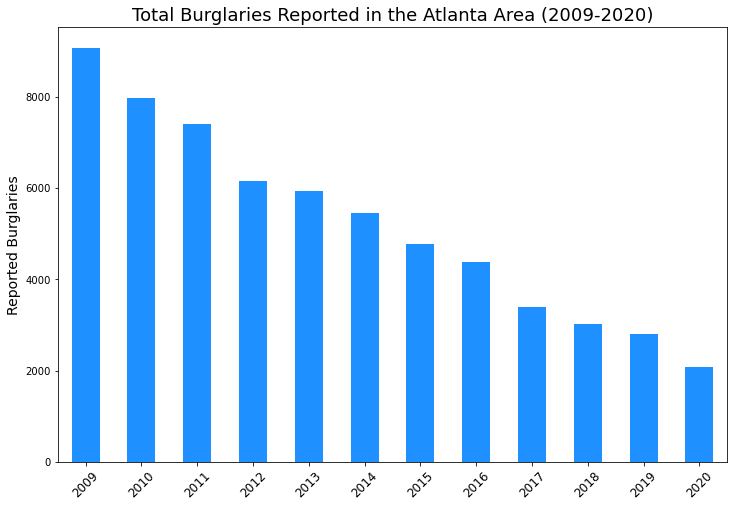

In [294]:
#Plot a bar chart of number of burglaries by year - just use the original counts; not the df
burglary_counts.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Burglaries Reported in the Atlanta Area (2009-2020)", fontsize = (18))
plt.ylabel("Reported Burglaries", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

#Quite a drop in burglaries in 2020; break out across 2018-2020 for closer look

    Year  Reported Burglaries
9   2018                 3022
10  2019                 2796
11  2020                 2089


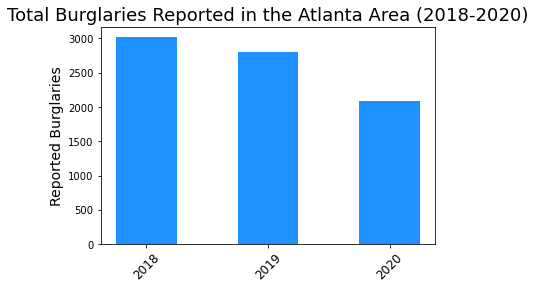

In [297]:
#Just pull 2018, 2019, 2020 for a more concentrated comparison of burglaries
three_years_burg = burglary_counts_df[(burglary_counts_df["Year"]==2018) |(burglary_counts_df["Year"]==2019) | (burglary_counts_df["Year"]==2020)]
print(three_years_burg)

#Set the chart type as bar, x-axis is the year, y is the number of burglaries, set color and width of bars
plt.bar(three_years_burg["Year"], three_years_burg["Reported Burglaries"], color = 'dodgerblue', align='center', width=0.5)

#Set placement of tick marks - just doing a pandas plot puts half year tick marks as well....
plt.xticks(three_years["Year"], rotation = 45, fontsize = (12))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Burglaries Reported in the Atlanta Area (2018-2020)", fontsize = (18))
plt.ylabel("Reported Burglaries", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

#2941 less crimes overall in 2020 vs 2019 - note that 707 of those alone are less burglaries.

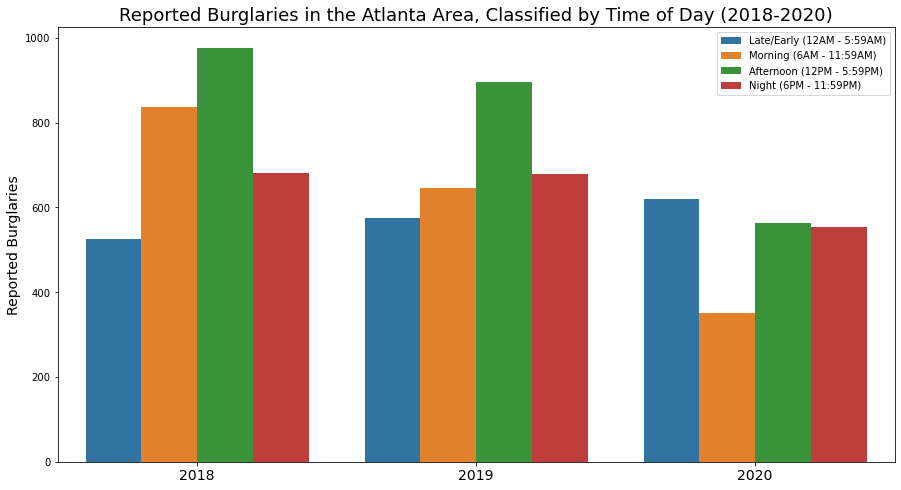

In [329]:
#Group by the year and time of day, count the number of burglaries 
time_burg_group =burglary_df.groupby(["occur_year", "Time Category"])['offense_id'].count()


#make time_offense into a dataframe and reset the index
time_burg_group_df = pd.DataFrame(time_burg_group).reset_index()
time_burg_group_df

#Just pull 2018, 2019, 2020 for a more concentrated comparison of burglaries
three_years_burg_time_df =time_burg_group_df[(time_burg_group_df["occur_year"]==2018) |(time_burg_group_df["occur_year"]==2019) | (time_burg_group_df["occur_year"]==2020)]
# print(three_years_burg_time_df)


# Use Matplotlib to set figure size ahead
plt.figure(figsize=(15,8))

#Plot with seaborn
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'Time Category', data = three_years_burg_time_df)

#Move the legend off of the plot to stop it from blocking data
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Reported Burglaries in the Atlanta Area, Classified by Time of Day (2018-2020)", fontsize = (18))
plt.ylabel("Reported Burglaries", fontsize = (14))
plt.xlabel("")
plt.xticks(fontsize = 14)

plt.show()

#Finally, another interesting find: Less burglaries in the morning and afternoon in 2020. Possibly due to folks being home during lockdown

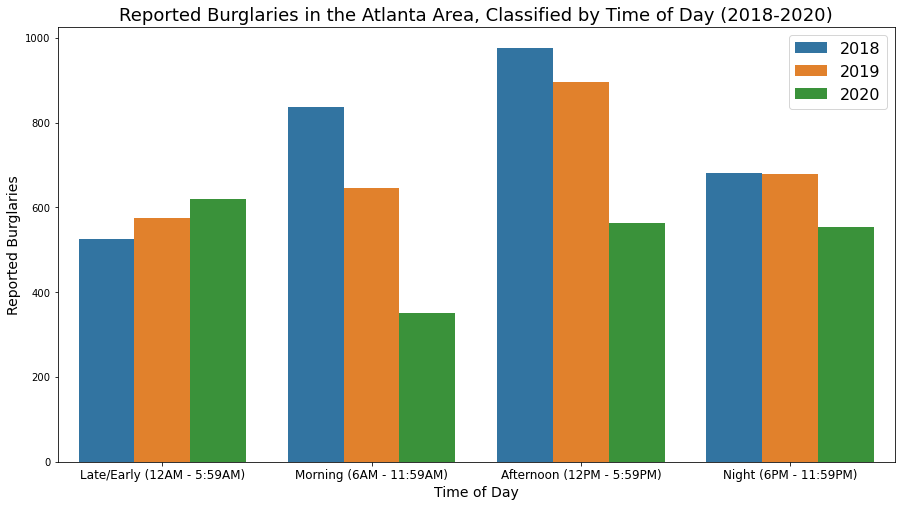

In [341]:
#Try plotting with time of day on the x and years in the legend
#Group by the year and time of day, count the number of burglaries 
time_burg_group =burglary_df.groupby(["occur_year", "Time Category"])['offense_id'].count()


#make time_offense into a dataframe and reset the index
time_burg_group_df = pd.DataFrame(time_burg_group).reset_index()
time_burg_group_df

#Just pull 2018, 2019, 2020 for a more concentrated comparison of burglaries
three_years_burg_time_df =time_burg_group_df[(time_burg_group_df["occur_year"]==2018) |(time_burg_group_df["occur_year"]==2019) | (time_burg_group_df["occur_year"]==2020)]
# print(three_years_burg_time_df)


# Use Matplotlib to set figure size ahead
plt.figure(figsize=(15,8))

#Plot with seaborn
sns.barplot(x = 'Time Category', y = 'offense_id', hue = 'occur_year', data = three_years_burg_time_df)

#Move the legend off of the plot to stop it from blocking data
plt.legend(bbox_to_anchor= (1, 1), fontsize = (16) );

#Add title and labels for each axis and set font size. 
plt.title("Reported Burglaries in the Atlanta Area, Classified by Time of Day (2018-2020)", fontsize = (18))
plt.ylabel("Reported Burglaries", fontsize = (14))
plt.xlabel("Time of Day", fontsize = (14))
plt.xticks(fontsize = 12)

plt.show()


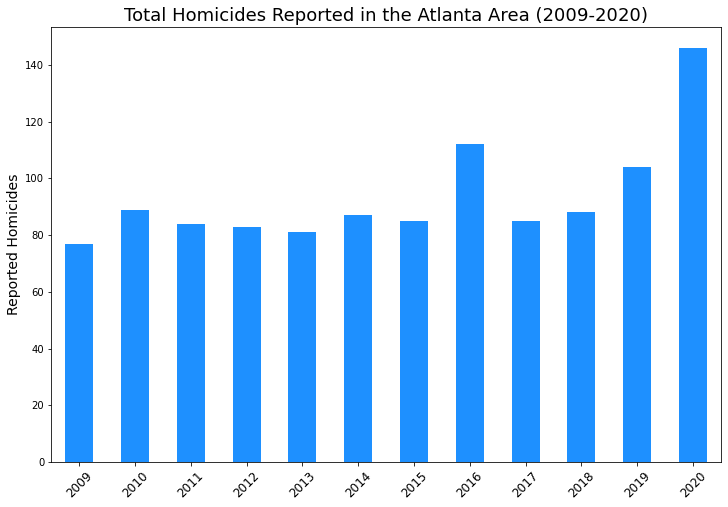

In [353]:
#Homicides might be interesting to look at in 2020 vs other years, as they seemed to go up
homicide_df = good_time_df.loc[(good_time_df["UC2_Literal"]=="HOMICIDE")]


#Get overall number of homicides reported per year
homicide_counts = homicide_df["occur_year"].value_counts()


#Sort the series by the year, which is the index in this case
homicide_sort = homicide_counts.sort_index(ascending = True)

#Plot a bar chart of number of homicides by year - just use the counts series, don't need a df
homicide_sort.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Homicides Reported in the Atlanta Area (2009-2020)", fontsize = (18))
plt.ylabel("Reported Homicides", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

#More homicides in 2020 than any other year. Now that's interesting too.


In [ ]:
#Plot a bar chart of number of homicides by year - just use the original counts; not the df
burglary_counts.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Burglaries Reported in the Atlanta Area (2009-2020)", fontsize = (18))
plt.ylabel("Reported Burglaries", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

#Quite a drop in burglaries in 2020; break out across 2018-2020 for closer look